In [38]:
import requests
from bs4 import BeautifulSoup
import re

In [39]:
##### INDEED #####

# a job posting website (as well as resume hosting)
# scrape some (or A LOT) of job postings from indeed for the job "data scientist"
# Plan of Action:
# http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA
# 1. Figure out the url for getting the summaries (by doing it yourself!)
# 2. Scrape the summary
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)
# 4. BONUS: count the most used words in the sumaries





In [40]:
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA')
beautiful_r = BeautifulSoup(r.text, 'html.parser')


In [41]:
beautiful_r.prettify()

u'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta content="text/html;charset=utf-8" http-equiv="content-type">\n   <!-- pll -->\n   <script src="/s/0198f4e/en_US.js" type="text/javascript">\n   </script>\n   <link href="/s/a6a334e/jobsearch_all.css" rel="stylesheet" type="text/css">\n    <link href="http://rss.indeed.com/rss?q=data+scientist&amp;l=San+Francisco%2C+CA" rel="alternate" title="Data Scientist Jobs, Employment in San Francisco, CA" type="application/rss+xml">\n     <link href="/m/jobs?q=data+scientist&amp;l=San+Francisco%2C+CA" media="handheld" rel="alternate">\n      <script type="text/javascript">\n       window[\'closureReadyCallbacks\'] = [];\n\n    function call_when_jsall_loaded(cb) {\n        if (window[\'closureReady\']) {\n            cb();\n        } else {\n            window[\'closureReadyCallbacks\'].push(cb);\n        }\n    }\n      </script>\n      <script src="/s/a0d57a9/jobsearch-all-compiled.js" type="text/javascript">\n      </script>\n      <script 

In [42]:
span_tag = beautiful_r.findAll('span', attrs={'class': 'summary'}) 
span_tag

[<span class="summary">Requirements for all <b>data</b> <b>scientists</b>. Expert in Python and core libraries used by <b>data</b> <b>scientists</b> (Numpy, Scipy, Pandas, Scikit-learn, Matplotlib/Seaborn, etc.)...</span>,
 <span class="summary"><b>Data</b> <b>Scientist</b> / Machine Learning <b>Scientist</b>. Strong knowledge of computer vision, sensor <b>data</b> fusion and analytics, and machine learning algorithms with proven...</span>,
 <span class="summary">Experience working closely with <b>data</b> <b>scientists</b>. Deep experience with using AWS for production systems at scale and have an exceptional grasp of high-level...</span>,
 <span class="summary" itemprop="description">\nThe most commons will be SQL for <b>data</b> extraction, R for <b>data</b> analysis and a combination of R and Tableau for <b>data</b> visualization....</span>,
 <span class="summary" itemprop="description">\nOur Consumer Marketing Analytics Center helps clients transform their marketing and sales by a

In [3]:
for i in range(10, 110, 10):
    r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start='+str(i)+'')
    soup = BeautifulSoup(r.text, 'html.parser')

soup.prettify()



u'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta content="text/html;charset=utf-8" http-equiv="content-type">\n   <!-- pll -->\n   <script src="/s/0198f4e/en_US.js" type="text/javascript">\n   </script>\n   <link href="/s/a6a334e/jobsearch_all.css" rel="stylesheet" type="text/css">\n    <link href="http://rss.indeed.com/rss?q=data+scientist&amp;l=San+Francisco%2C+CA" rel="alternate" title="Data Scientist Jobs, Employment in San Francisco, CA" type="application/rss+xml">\n     <link href="/m/jobs?q=data+scientist&amp;l=San+Francisco%2C+CA" media="handheld" rel="alternate">\n      <script type="text/javascript">\n       window[\'closureReadyCallbacks\'] = [];\n\n    function call_when_jsall_loaded(cb) {\n        if (window[\'closureReady\']) {\n            cb();\n        } else {\n            window[\'closureReadyCallbacks\'].push(cb);\n        }\n    }\n      </script>\n      <script src="/s/a0d57a9/jobsearch-all-compiled.js" type="text/javascript">\n      </script>\n      <script 

In [5]:
span_tag_all = soup.findAll('span', attrs={'class': 'summary'}) 
span_tag_all

[<span class="summary">Are you interested in working at the intersection of applied optimization, machine learning, engineering development, and advanced <b>data</b> analysis?...</span>,
 <span class="summary">Marketplace Optimization <b>Data</b> Science is Uber\u2019s team of statisticians, economists, machine learning <b>scientists</b>, and operations researchers who develop and own...</span>,
 <span class="summary"><b>Data</b> <b>scientists</b> are responsible for the entire pipeline:. Comfort with statistical methods and technical tools including any of SQL, econometrics, R, Python,...</span>,
 <span class="summary" itemprop="description">\nRequirements for all <b>data</b> <b>scientists</b>. Expert in Python and core libraries used by <b>data</b> <b>scientists</b> (Numpy, Scipy, Pandas, Scikit-learn, Matplotlib/Seaborn, etc.)...</span>,
 <span class="summary" itemprop="description">\nPosition also requires 1-3 years experience in Health Care (managed care, academic, or gov't payer)

In [43]:
summary_texts = [t.text.lower().strip() for t in span_tag]

summary_texts[0]

u'requirements for all data scientists. expert in python and core libraries used by data scientists (numpy, scipy, pandas, scikit-learn, matplotlib/seaborn, etc.)...'

In [47]:
single_block_of_text = reduce(lambda x, y: x+' '+y, summary_texts)
single_block_of_text

words_tokenized = single_block_of_text.split(' ') 
words_tokenized[:10]

[u'requirements',
 u'for',
 u'all',
 u'data',
 u'scientists.',
 u'expert',
 u'in',
 u'python',
 u'and',
 u'core']

In [48]:
from collections import Counter
sorted(Counter(words_tokenized).items(), key = lambda x: x[1])[-20:]

[(u'scientists', 3),
 (u'be', 3),
 (u'marketing', 3),
 (u'on', 3),
 (u'r', 3),
 (u'is', 3),
 (u'analytics', 4),
 (u'an', 4),
 (u'a', 4),
 (u'experience', 5),
 (u'with', 5),
 (u'in', 6),
 (u'the', 6),
 (u'learning', 7),
 (u'to', 8),
 (u'machine', 8),
 (u'of', 9),
 (u'for', 9),
 (u'data', 19),
 (u'and', 23)]

In [8]:
#### UFO ######

# SCRAPE ALL SIGHTINGS in 2016
# Plan of action
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings
# 3. Make a dataframe out of it
# 4. make a day column
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)

#response = requests.get('http://www.omdbapi.com/?t='+title+'&r=json&type=movie').json()





In [14]:
ufo_sightings = {
        'Date':[],
        'City':[],
        'State':[],
        'Shape':[],
        'Summary':[]
    }
for i in ('01', '02', '03', '04', '05', '06', '07', '08'):
    r = requests.get('http://www.nuforc.org/webreports/ndxe2016'+i+'.html')
    b = BeautifulSoup(r.text, "html.parser")
    for tr in b.findAll('tr', attrs = {'valign':'TOP'}):
        ufo_sighting_info = []
        for child in tr.findChildren():
            ufo_sighting_info.append(child.text)
        ufo_sightings['Date'].append(ufo_sighting_info[0])
        ufo_sightings['City'].append(ufo_sighting_info[3])
        ufo_sightings['State'].append(ufo_sighting_info[5])
        ufo_sightings['Shape'].append(ufo_sighting_info[7])
        ufo_sightings['Summary'].append(ufo_sighting_info[12])



In [15]:
import pandas as pd

In [16]:
ufo = pd.DataFrame(ufo_sightings)
ufo.head()

,City,Date,Shape,State,Summary
0,Stanton,1/31/16 23:10,Triangle,TX,"Flying Triangle object Martin County, TX."
1,Emigrant Pass (near; foothills of),1/31/16 23:00,Other,OR,Seen a object with a solid orange bar that lit...
2,Allentown,1/31/16 22:00,Fireball,PA,"Yellow beam of light falling from the sky, wit..."
3,Sandpoint,1/31/16 20:57,Fireball,ID,Object came in from west to east below approx ...
4,West Suffield,1/31/16 20:46,Circle,CT,\tI saw 3 orange lights in a formation coming ...


In [18]:
from datetime import datetime


In [25]:
def parse_date(x):
    for fmt in ('%m/%d/%y %H:%M', '%m/%d/%y'):
        try:
            return datetime.strptime(x, fmt)
        except ValueError:
            pass

ufo['Time'] = ufo.Date.apply(parse_date)
ufo.Time.head(5)

0   2016-01-31 23:10:00
1   2016-01-31 23:00:00
2   2016-01-31 22:00:00
3   2016-01-31 20:57:00
4   2016-01-31 20:46:00
Name: Time, dtype: datetime64[ns]

In [26]:
ufo['Day'] = ufo.Time.dt.day
ufo.Day.head(5)

0    31
1    31
2    31
3    31
4    31
Name: Day, dtype: int64

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

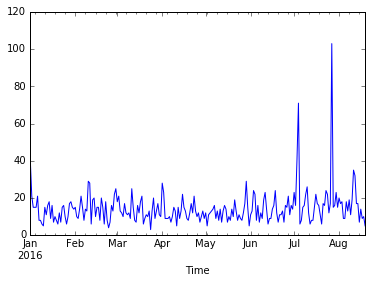

In [36]:
ufo.groupby(pd.Grouper(key='Time', freq='1d')).count().Day.plot()


In [ ]:
##### TWITTER ######

# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
# include a column for date, text, user handle, user name, and user image
# You can use the normal query method and not stream for this!

In [8]:
import tweepy       # python wrapper for twitter api
import json
import datetime

In [9]:
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [20]:
tag = 'lochtegate'

In [21]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object
tweets = api.search(q=tag)

In [22]:
print tweets[0].author.name

Mariam


In [23]:
tweet_zoosk = {
        'date':[],
        'text':[],
        'user_handle':[],
        'username':[],
        'user_image':[]
    }

In [24]:
print tweets[0].author.screen_name
print tweets[0].text

mariam_jebari
RT @_MissLeandra: Insulting how Gabby Douglas(20) was being told she needs to fix her attitude in Rio, but #LochteGate and crew are all "ki…


In [25]:
def make_data_frame(tweets):
    dataset = pd.DataFrame()
    dataset['date'] = [tweet.created_at for tweet in tweets]
    dataset['text'] = [tweet.text for tweet in tweets]
    dataset['user_handle'] = [tweet.author.screen_name for tweet in tweets]
    dataset['username'] = [tweet.author.name for tweet in tweets]
    dataset['user_image'] = [tweet.author.profile_image_url for tweet in tweets]
    return dataset


In [26]:
q= make_data_frame(tweets)
print q.head()

                 date                                               text  \
0 2016-08-20 04:22:01  RT @_MissLeandra: Insulting how Gabby Douglas(...   
1 2016-08-20 04:21:50  RT @catie__warren: The fact that anyone thinks...   
2 2016-08-20 04:21:45  RT @elweb: My friend Claire nails it #lochtega...   
3 2016-08-20 04:21:43  RT @JasonSereno: #BreakingNews According to mu...   
4 2016-08-20 04:21:42  RT @tariqnasheed: If Black athletes pulled tha...   

      user_handle      username  \
0   mariam_jebari        Mariam   
1  ticketanywhere  Sharon Mason   
2     cbaldilocks   not caitlin   
3   turkhasan5461     turkhasan   
4      _shutupjai        jaii ✨   

                                          user_image  
0  http://pbs.twimg.com/profile_images/7380074041...  
1  http://pbs.twimg.com/profile_images/6871345791...  
2  http://pbs.twimg.com/profile_images/7071352513...  
3  http://pbs.twimg.com/profile_images/7658898550...  
4  http://pbs.twimg.com/profile_images/7623948210...  


None
